
# Adding a cyclic point to help with wrapping of global data

Cartopy represents data in Cartesian projected coordinates, meaning that 350
degrees longitude, is not just 10 degrees away from 0 degrees as it is when
represented in spherical coordinates. This means that the plotting methods will
not plot data between the last and the first longitude.

To help with this, the data and longitude/latitude coordinate arrays can be
expanded with a cyclic point to close this gap. The routine
`~cartopy.util.add_cyclic` repeats the last data column. It can also add the
first longitude plus the cyclic keyword (defaults to 360) to the end of the
longitude array so that the data values at the ending longitudes will be closed
to the wrap point.


/Users/ponsm/anaconda3/envs/extra_postprocess/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


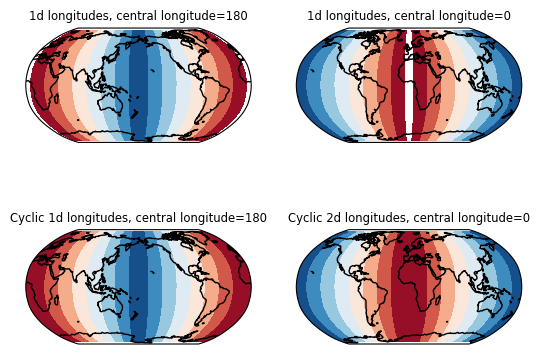

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.util as cutil


def main():

    # data with longitude centers from 0 to 360
    nlon = 24
    nlat = 12
    # 7.5, 22.5, ..., 337.5, 352.5
    dlon = 360//nlon
    lon = np.linspace(dlon/2., 360.-dlon/2., nlon)
# -82.5, -67.5, ..., 67.5, 82.5
    dlat = 180//nlat
    lat = np.linspace(-90.+dlat/2., 90.-dlat/2., nlat)
    # 0, 1, ..., 10, 11, 11, 10, ..., 1, 0
    data = np.concatenate((np.arange(nlon // 2),
                           np.arange(nlon // 2)[::-1]))
    data = np.tile(data, nlat).reshape((nlat, nlon))

    fig = plt.figure()

    # plot with central longitude 180
    ax1 = fig.add_subplot(2, 2, 1,
                          projection=ccrs.Robinson(central_longitude=180))
    ax1.set_title("1d longitudes, central longitude=180",
                  fontsize='small')
    ax1.set_global()
    ax1.contourf(lon, lat, data,
                 transform=ccrs.PlateCarree(), cmap='RdBu')
    ax1.coastlines()

    # plot with central longitude 0
    ax2 = fig.add_subplot(2, 2, 2,
                          projection=ccrs.Robinson(central_longitude=0))
    ax2.set_title("1d longitudes, central longitude=0",
                  fontsize='small')
    ax2.set_global()
    ax2.contourf(lon, lat, data,
                 transform=ccrs.PlateCarree(), cmap='RdBu')
    ax2.coastlines()

    # add cyclic points to data and longitudes
    # latitudes are unchanged in 1-dimension
    cdata, clon, clat = cutil.add_cyclic(data, lon, lat)
    ax3 = fig.add_subplot(2, 2, 3,
                          projection=ccrs.Robinson(central_longitude=180))
    ax3.set_title("Cyclic 1d longitudes, central longitude=180",
                  fontsize='small')
    ax3.set_global()
    ax3.contourf(clon, clat, cdata,
                 transform=ccrs.PlateCarree(), cmap='RdBu')
    ax3.coastlines()

    # add_cyclic also works with 2-dimensional data
    # Cyclic points are added to data, longitudes, and latitudes to
    # ensure the dimensions of the returned arrays are all the same shape.
    lon2d, lat2d = np.meshgrid(lon, lat)
    cdata, clon2d, clat2d = cutil.add_cyclic(data, lon2d, lat2d)
    ax4 = fig.add_subplot(2, 2, 4,
                          projection=ccrs.Robinson(central_longitude=0))
    ax4.set_title("Cyclic 2d longitudes, central longitude=0",
                  fontsize='small')
    ax4.set_global()
    ax4.contourf(clon2d, clat2d, cdata,
                 transform=ccrs.PlateCarree(), cmap='RdBu')
    ax4.coastlines()

    plt.show()


if __name__ == '__main__':
    main()